# Garbage Image Classification

**Jiachen Rao, Jim Yang, Yutian Mei**        

*Mar. 2025*

In [ ]:
# Colab Link

# https://colab.research.google.com/drive/1ivITmclSGxksjP5Za_uoElRAggY9Lwgj?usp=sharing

### Project Motiviation & Description


Sometimes, it is frustrating not knowing which type of garbage you are about to throw out. To address this issue, the team proposes training a deep learning model to classify garbage into three categories, recyclable materials, non-recyclable materials, and organic waste, based on their composition.

The team collected image data from multiple online databases to construct the full dataset for this project. The team explored two methods for building machine learning models to classify the images. The first method was to fine-tune the pre-trained ResNet18 model. The second method was to use a transfer learning technique that utilizes the ResNet18 model to extract features from images, which are then used to train a CNN model to classify the images based on those features. The performences of the models are evaluated and presented in this document. Future steps for this project are also outlined at the end of this report.


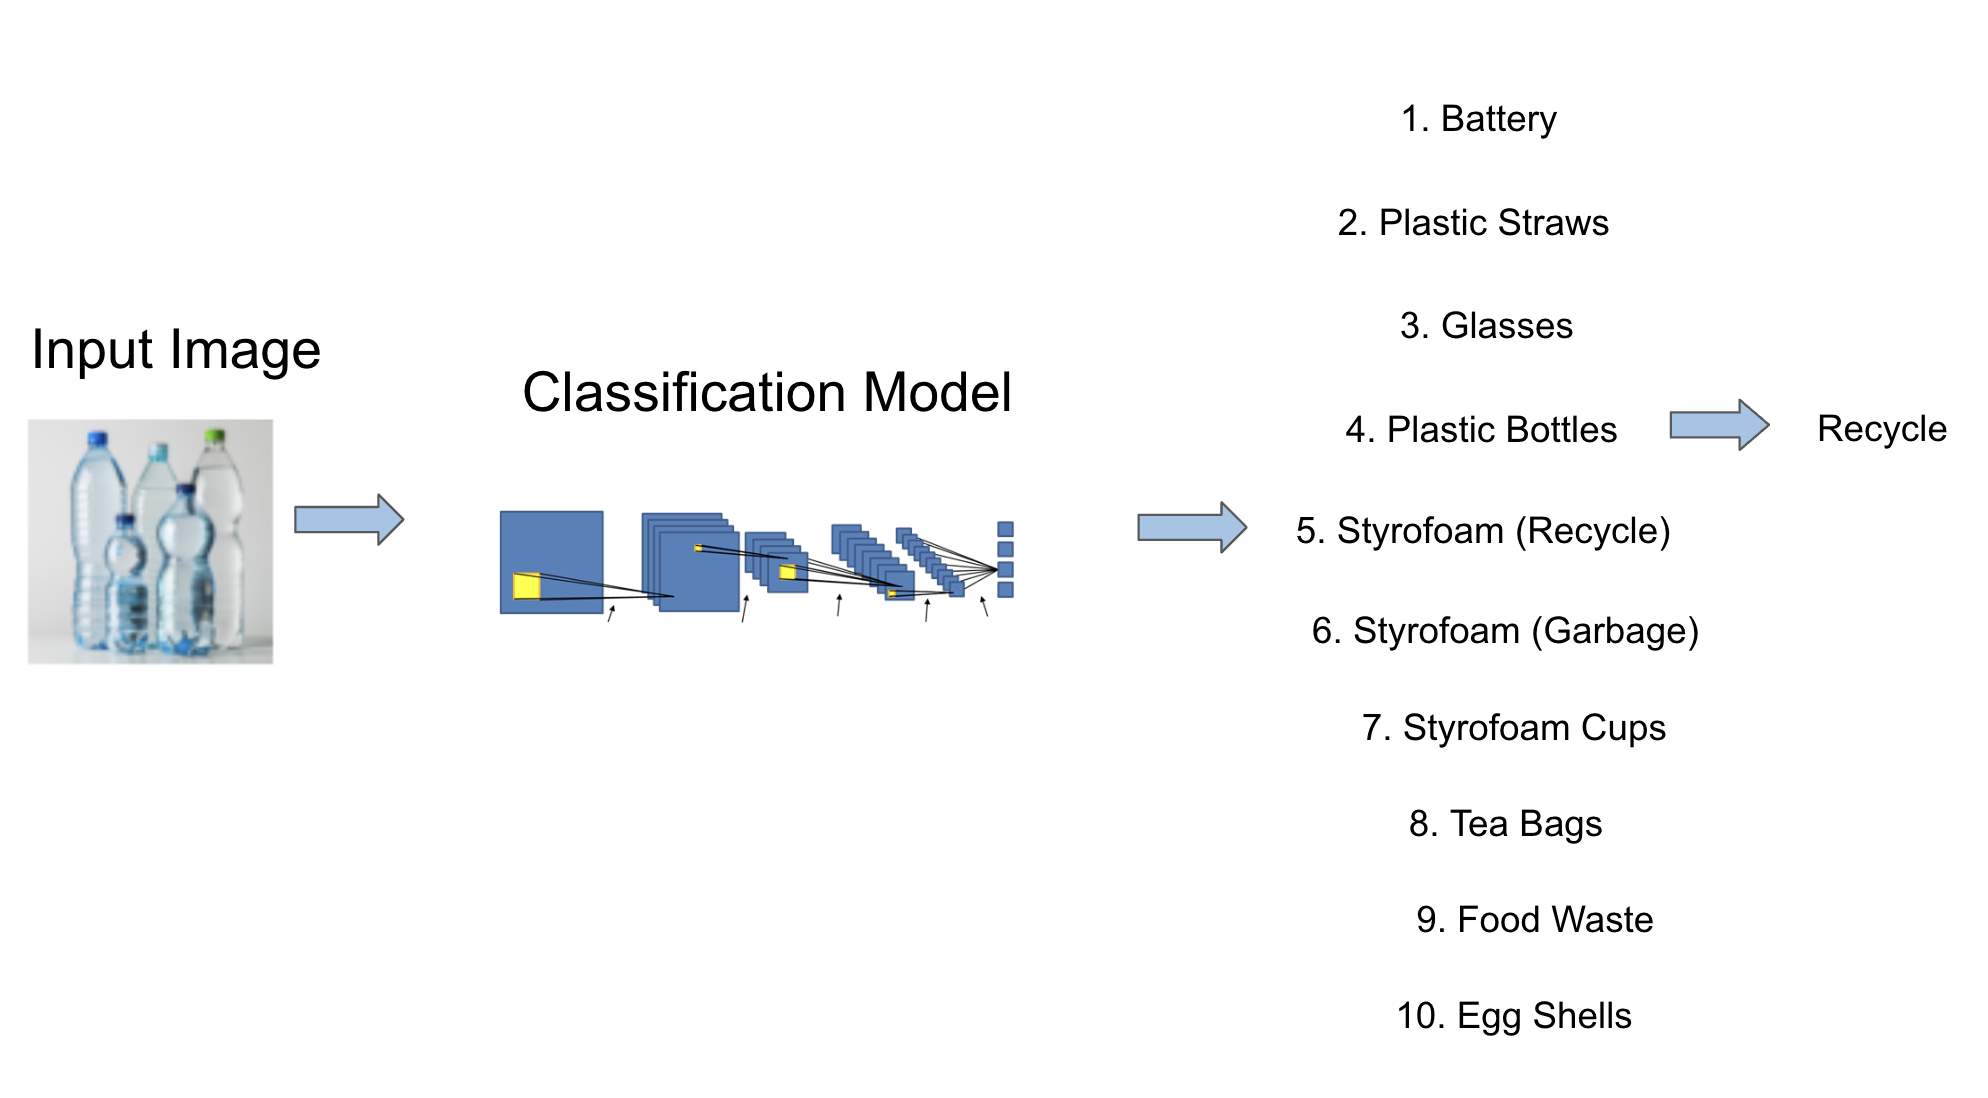

### Data Collection & Dataset Construction

The team proposes to classify as much materials as we can. Due to computation resource limitation, we have focused on 9 item categories in this phase, namely battery, plastic straws, glasses, plastic bottles, styrofoam food containers, styrofoam cups, eggshells, food waste, and tea bags. According to both City of Toronto's and University of Toronto's guidelines, batteries are classified as non-recyclable hazardous waste. Plastic straws are non-recyclable. Glasses, plastic bottles, and styrofoam cups can be recycled. Eggshells, food waste, and tea bags are considered organic waste. However, the classification of styrofoam food containers is more complicated. Only non-black and clean ones can be divided into recyclable category, while others are non-recyclable.

For network training, we collected images from datasets 'Recyclable and Household Waste Classification' and 'Garbage Classification - 6 classes' in Kaggle. To ensure data balancing and improve our dataset, we deleted mislabeled or damaged images, and ensured each category mentioned above to have 500 images, excluding styrofoam food containers.

**Data Classes**

*Garbage*

1. Battery
2. Plastic Straws
3. Styrofoam Food Containers (Garbage)

*Recycle*
1. Glasses
2. Plastic bottles
3. Styrofoam Cups
4. Styrofoam Food Containers (Recyclable)

*Food Waste*

1. Eggshells
2. Food waste
3. Tea bags

Most of our choices of garbage have similar appearances or belong to the same materials, which makes our work even more challenging. Some of them are even commonly misinterpreted by citizens. The dataset consists of both images for reference (with clear backgrounds) and images from real world (with diversed backgrounds) to ensure model robustness.

**Link to datasets:**

[https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification/data]
[https://www.kaggle.com/datasets/quangtheng/garbage-classification-6-classes-775class?select=plastic]

**Brief Visualization**

In [ ]:
_ = !unzip "/content/img1.zip" -d "/content/img1"

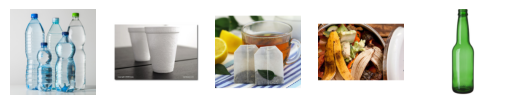

In [ ]:
import matplotlib.pyplot as plt
import os

image_folder = "/content/img1"
image_files = os.listdir(image_folder)
for i in range(5):
  image_path = os.path.join(image_folder, image_files[i])
  image = plt.imread(image_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

Images of styrofoam food containers are divided manually into two categories, based on their colour and cleanliness.

**Image Examples**

In [ ]:
_ = !unzip "/content/img2.zip" -d "/content/img2"

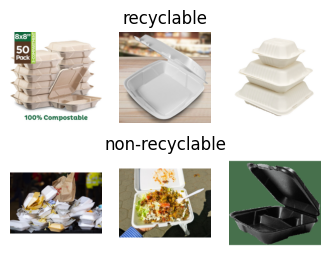

In [ ]:
image_folder_1, image_folder_2 = "/content/img2/1", "/content/img2/2"
image_files_1, image_files_2 = os.listdir(image_folder_1), os.listdir(image_folder_2)
plt.figure(figsize=(4, 3))
for i in range(3):
  image_path = os.path.join(image_folder_1, image_files_1[i])
  image = plt.imread(image_path)
  plt.subplot(2, 3, i+1)
  plt.imshow(image)
  plt.axis('off')
  if i == 1:
    plt.title('recyclable')
  image_path = os.path.join(image_folder_2, image_files_2[i])
  image = plt.imread(image_path)
  plt.subplot(2, 3, i+4)
  plt.imshow(image)
  plt.axis('off')
  if i == 1:
    plt.title('non-recyclable')
plt.show()

To ensure data balancing, we performed data augmentation on the two classes shown above. Now that we have 5,000 images in total, 500 for each class.

**Data Augmentation**

In [ ]:
_ = !unzip "/content/styrofoamcontainer_recycling.zip" -d "/content/img"

In [ ]:
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

transform = A.Compose([
  A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.8),
  A.HorizontalFlip(p=0.5),
  A.Transpose(p=0.2),
  A.RandomCrop(width=224, height=224),
])

input_folder = '/content/img'
output_folder = '/content/aug_img'
for filename in os.listdir(input_folder):
  img_path = os.path.join(input_folder, filename)
  img = np.array(Image.open(img_path))
  augmented_imgs = [transform(image=img)['image'] for _ in range(1)]

  for i, aug_img in enumerate(augmented_imgs):
    aug_img_bgr = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    output_path = os.path.join(output_folder, f"{filename[:-4]}_aug_{i}.jpg")
    cv2.imwrite(output_path, aug_img_bgr)

In [ ]:
import zipfile

with zipfile.ZipFile('img.zip', 'w') as zipf:
  for filename in os.listdir(output_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(output_folder, filename)
            zipf.write(file_path, arcname=filename)
zipf.close()

In [ ]:
_ = !unzip "/content/styrofoamcontainer_non.zip" -d "/content/styrofoamcontainer"

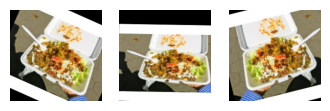

In [ ]:
import matplotlib.pyplot as plt
import os

image_folder = "/content/styrofoamcontainer"
image_files = os.listdir(image_folder)
plt.figure(figsize=(4, 1.5))
for i in range(3):
  image_path = os.path.join(image_folder, image_files[i])
  image = plt.imread(image_path)
  plt.subplot(1, 3, i+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

**We used the following codes for image preprocessing (resizing to 224x224).**

In [ ]:
_ = !unzip "/content/styrofoamcontainer_non.zip" -d "/content/styrofoamcontainer"

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

input_folder = '/content/styrofoamcontainer'
output_folder = '/content/styrofoamcontainer_nonrecycle'

for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (224, 224))
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)

In [ ]:
import zipfile

with zipfile.ZipFile('styrofoamcup_nonrecycling.zip', 'w') as zipf:
  for filename in os.listdir(output_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(output_folder, filename)
            zipf.write(file_path, arcname=filename)
zipf.close()

Meanwhile, we have collecting garbage images from real life. Those images are used for part of the final assessment of our model and during presentation.

**Image Examples**

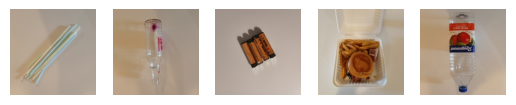

In [ ]:
image_folder = "/content/image"
image_files = os.listdir(image_folder)
for i in range(5):
  image_path = os.path.join(image_folder, image_files[i])
  image = plt.imread(image_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

### Method 1: Fine-Tune ResNet18


The team decided to use a 10-class multi-class classification instead of 3 classes. The model first separates the images into their actual categories. Then, another algorithm determines the correct garbage type for each item according to the classification category.

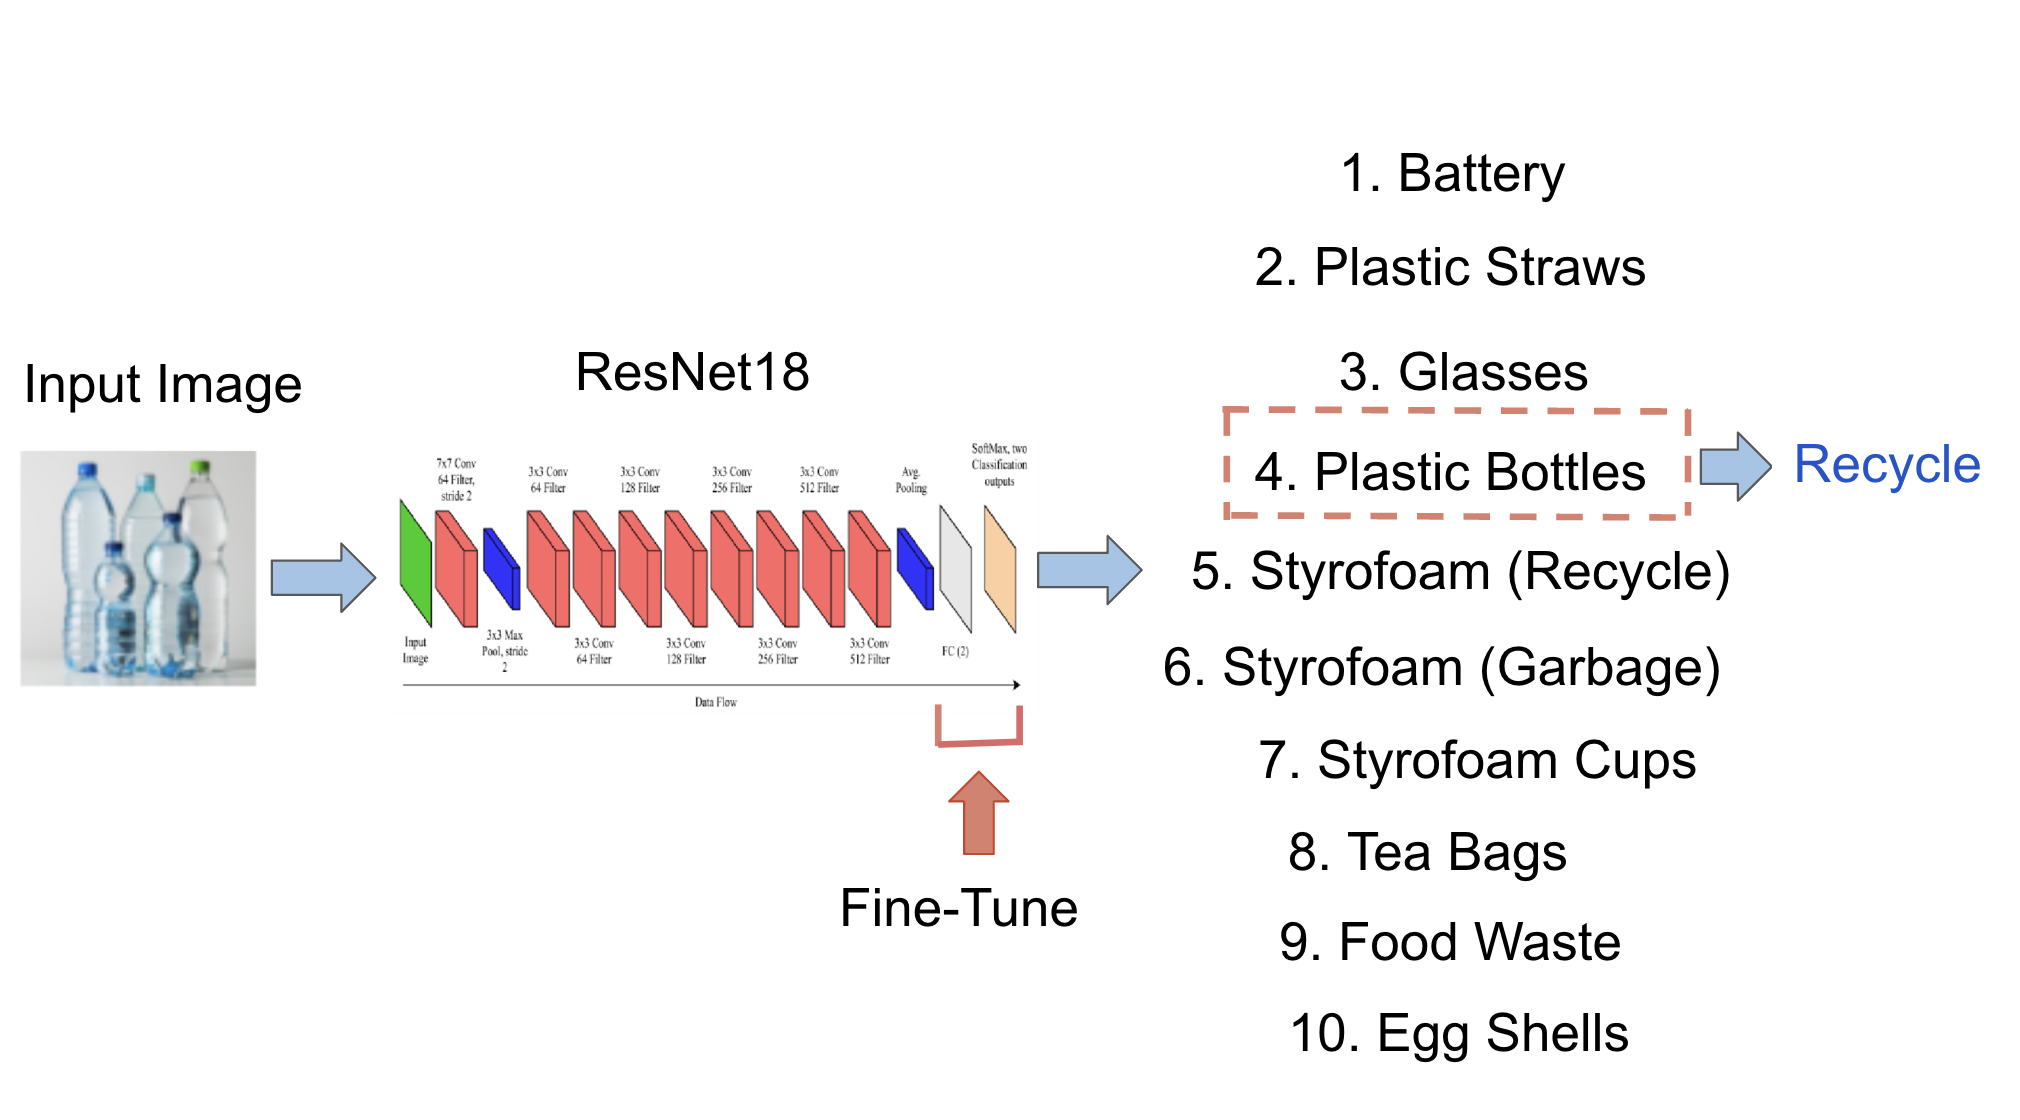

**Imports**

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Subset, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


**Load Images**

The images are first transformed to 224 x 224 to better work with ResNet18 model. The training data consists of 65% of the data. The validation data consists of 15% of the data. The test data consists of 20% of the overall data.

There are a total of **5000 images** in the dataset.

Training samples: **3250**

Validation samples: **752**

Test samples: **998**

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load all images from a single folder
dataset_path = "/content/drive/MyDrive/Meng/Winter/1517_Project/img"
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into train (65%), val (15%), test (20%)
train_idx, temp_idx = train_test_split(range(len(full_dataset)), test_size=0.35, stratify=full_dataset.targets, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.57, stratify=[full_dataset.targets[i] for i in temp_idx], random_state=42)

# Create Subset Datasets
train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)
test_dataset = Subset(full_dataset, test_idx)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Print dataset split sizes
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Training samples: 3250
Validation samples: 752
Test samples: 998


**Freeze Pre-train Layers**

The fine-tune process only fine-tunes the classification layer (fully connected layer) in the ResNet18 model. All other parameters are fixed and freezed during fine-tuning of the ResNet18 model.

Trainable Parameters:

**fc.weight**

**fc.bias**

In [ ]:
model = models.resnet18(pretrained=True)

# Modify the fully connected layer first
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

# Freeze all layers except the final FC layer
for param in model.parameters():
    param.requires_grad = False

# Train only the final fully connected layer
for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

Trainable Parameters:
fc.weight
fc.bias


**Fine-Tuning ResNet18**

In [ ]:
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    # Store metrics for plotting
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Compute training loss and accuracy
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total * 100
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        # Validation phase
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Compute validation loss and accuracy
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct / val_total * 100
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        # Print metrics
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%, "
              f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")

    print("Training complete!")

    # Return training metrics for plotting
    return train_losses, train_accuracies, val_losses, val_accuracies

In [ ]:
train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=20
)

torch.save(model.state_dict(), "fine_tuned_resnet18_after.pth")
print("Model saved successfully!")


Epoch [1/20], Train Loss: 2.1141, Train Acc: 26.03%, Val Loss: 1.8437, Val Acc: 43.35%
Epoch [2/20], Train Loss: 1.6776, Train Acc: 55.35%, Val Loss: 1.4634, Val Acc: 65.96%
Epoch [3/20], Train Loss: 1.3641, Train Acc: 70.77%, Val Loss: 1.2021, Val Acc: 75.80%
Epoch [4/20], Train Loss: 1.1520, Train Acc: 76.71%, Val Loss: 1.0054, Val Acc: 80.59%
Epoch [5/20], Train Loss: 0.9994, Train Acc: 79.75%, Val Loss: 0.8857, Val Acc: 82.18%
Epoch [6/20], Train Loss: 0.8859, Train Acc: 82.98%, Val Loss: 0.8024, Val Acc: 83.64%
Epoch [7/20], Train Loss: 0.7988, Train Acc: 83.66%, Val Loss: 0.7160, Val Acc: 84.84%
Epoch [8/20], Train Loss: 0.7304, Train Acc: 85.35%, Val Loss: 0.6696, Val Acc: 86.30%
Epoch [9/20], Train Loss: 0.6763, Train Acc: 85.97%, Val Loss: 0.6131, Val Acc: 86.57%
Epoch [10/20], Train Loss: 0.6303, Train Acc: 86.65%, Val Loss: 0.5816, Val Acc: 86.44%
Epoch [11/20], Train Loss: 0.5882, Train Acc: 86.80%, Val Loss: 0.5487, Val Acc: 87.23%
Epoch [12/20], Train Loss: 0.5555, Train 

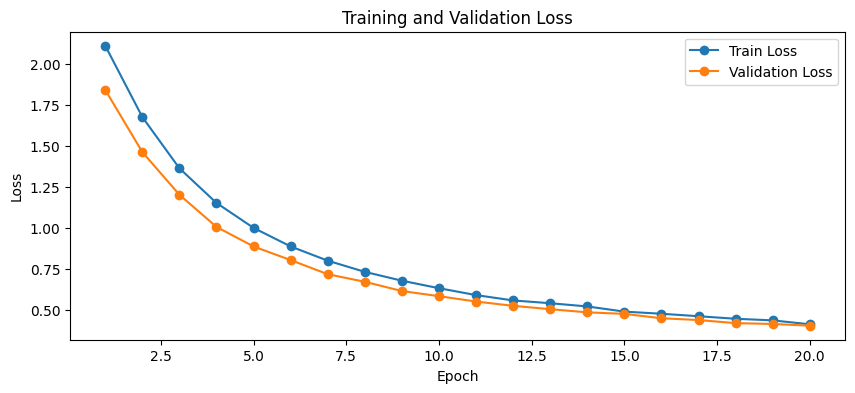

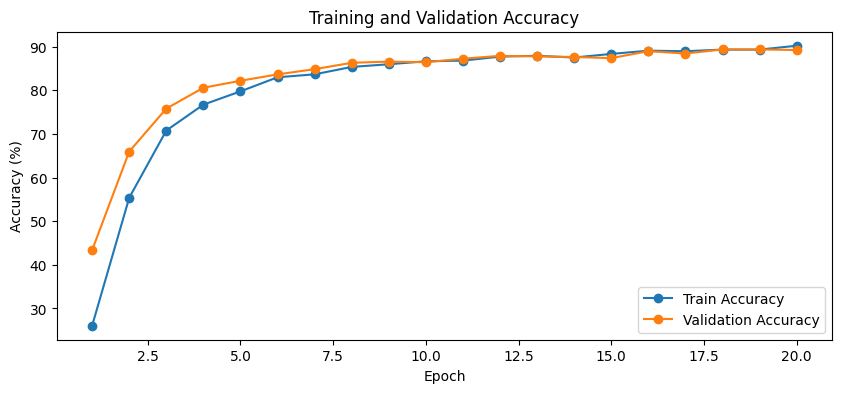

In [ ]:
# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

**Test Set Evaluation**

In [ ]:
# Evaluate on Test Set
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 90.38%


**Confusion Matrix of Test set**

In [ ]:
# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

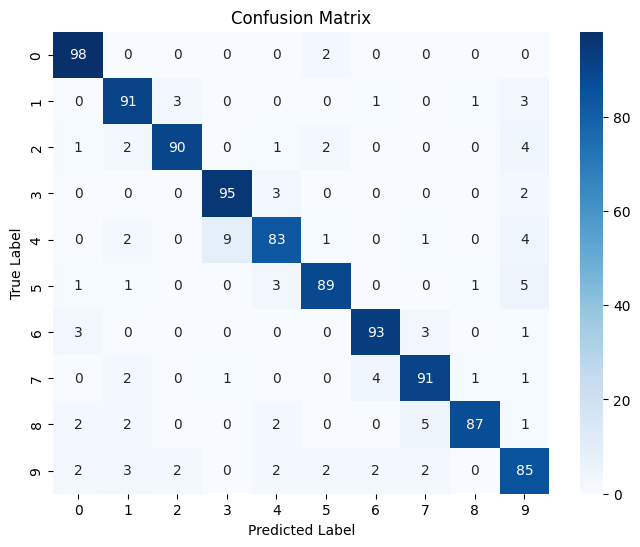

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Method 2: Transfer-Learning using Resnet18 + CNN

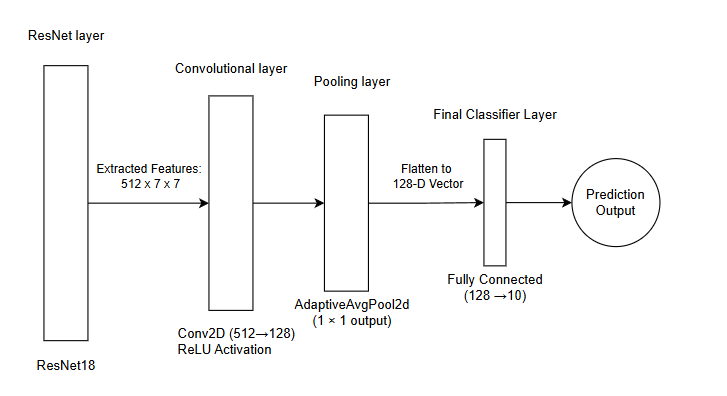

**Loading Data**

In [ ]:
_ = !unzip '/content/img.zip' -d "/content/img"

**Training Model**

In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18 = nn.Sequential(*list(resnet18.children())[:-1])

if torch.cuda.is_available():
  resnet18 = resnet18.cuda()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


In [ ]:
from torch.utils.data import Dataset
class TransformedSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

We reshape the training image size and adjust the image color to expose the model to diverse views of the data. This helps the model learn more general, high-level features that are robust to variations in image scale, location, and appearance.  
Meanwhile, we keep the validation and test sets unchanged to ensure fair, consistent, and reliable evaluation of model performance.

In [ ]:
dataset = '/content/img'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(dataset, transform=None)
classes = dataset.classes

indices = list(range(len(dataset)))
targets = np.array(dataset.targets)


test_split = 0.2

train_val_indices, test_indices = train_test_split(
    indices, test_size=test_split, random_state=42, stratify=targets
)


valid_split = 0.25


train_val_targets = targets[train_val_indices]
train_indices, val_indices = train_test_split(
    train_val_indices, test_size=valid_split, random_state=42, stratify=train_val_targets
)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset = TransformedSubset(Subset(dataset, train_indices), transform=train_transform)
val_dataset = TransformedSubset(Subset(dataset, val_indices), transform=transform)
test_dataset = TransformedSubset(Subset(dataset, test_indices), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Unlike our previous assignment, we did not create an extract_feature function to preprocess the input using ResNet before passing it to the model. Instead, I we integrated ResNet directly inside CNN. This means that every input image first passes through ResNet, which extracts high-level features, before being processed by the custom convolutional layers.Additionally, we remove the final classifier layer of the ResNet and add our own convolutional layer afterward.

Since CNN starts with convolutional layers, we modified the input size from 3 channels (RGB images) to 512 channels (ResNet's extracted feature maps). This adjustment ensures that the convolutional layers can effectively learn from the feature-rich representations produced by ResNet.

By embedding ResNet within the CNN model, we eliminated the need for separate preprocessing steps, allowing it to handle raw images directly while still leveraging ResNet's feature extraction capabilities. This approach provides greater flexibility in processing input images and enables the CNN to build upon the powerful representations learned by ResNet.


In [ ]:
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18 = nn.Sequential(*list(resnet18.children())[:-1])

if torch.cuda.is_available():
  resnet18 = resnet18.cuda()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
class ResNet_CNN(nn.Module):
  def __init__(self, num_classes=10):
    super(ResNet_CNN, self).__init__()

    self.resnet = torchvision.models.resnet18(pretrained=True)
    self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])  # Remove last FC layer

    self.conv1 = nn.Conv2d(512, 128, kernel_size=3, padding=1)

    self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

    self.fc = nn.Linear(128, num_classes)

  def forward(self, x):
    x = self.resnet(x)

    x = F.relu(self.conv1(x))
    x = self.global_pool(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)

    return x

In [ ]:
def train(model, train_loader, val_loader, learning_rate, epochs, checkpoint_path="/content/best_cnn_model.pth"):

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

  train_losses, train_accuracies = [], []
  val_losses, val_accuracies = [], []
  best_loss = float("inf")

  for epoch in range(epochs):
    model.train()
    train_loss_epoch = 0.0
    correct, total = 0, 0
    # Get train result
    for imgs, labels in train_loader:
      if torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      outputs = model(imgs)

      optimizer.zero_grad()
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      train_loss_epoch += loss.item()
      _, predicted = outputs.max(1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    epoch_acc = correct / total * 100
    avg_train_loss = train_loss_epoch / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(epoch_acc)

    model.eval()
    val_loss_epoch = 0.0
    val_correct, val_total = 0, 0
    with torch.no_grad():
      for imgs, labels in val_loader:
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        val_loss_epoch += loss.item()
        _, predicted = outputs.max(1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

    val_epoch_acc = val_correct / val_total * 100
    avg_val_loss = val_loss_epoch / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_epoch_acc)

    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Best model saved at epoch {epoch+1} with validation loss: {best_loss:.4f}")

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

  return model, train_losses, val_losses, best_loss, train_accuracies, val_accuracies

**Train Result**

Additionally, to prevent the ResNet from continuing to learn during training, we freeze its parameters by setting:

```python
param.requires_grad = False
```

In [ ]:
model = ResNet_CNN()
for param in model.resnet.parameters():
  param.requires_grad = False

if torch.cuda.is_available():
  model.cuda()

model, train_losses, val_loss, best_loss, train_accuracies, val_accuracies = train(model, train_loader, val_loader, learning_rate=0.01, epochs=30)


Best model saved at epoch 1 with validation loss: 0.5608
Epoch 1/30, Train Loss: 1.3636, Val Loss: 0.5608
Best model saved at epoch 2 with validation loss: 0.4809
Epoch 2/30, Train Loss: 0.6250, Val Loss: 0.4809
Best model saved at epoch 3 with validation loss: 0.4068
Epoch 3/30, Train Loss: 0.4707, Val Loss: 0.4068
Epoch 4/30, Train Loss: 0.4272, Val Loss: 0.4660
Best model saved at epoch 5 with validation loss: 0.3904
Epoch 5/30, Train Loss: 0.3993, Val Loss: 0.3904
Epoch 6/30, Train Loss: 0.3648, Val Loss: 0.4032
Epoch 7/30, Train Loss: 0.3512, Val Loss: 0.4808
Epoch 8/30, Train Loss: 0.3310, Val Loss: 0.4492
Best model saved at epoch 9 with validation loss: 0.3835
Epoch 9/30, Train Loss: 0.3277, Val Loss: 0.3835
Epoch 10/30, Train Loss: 0.3686, Val Loss: 0.4688
Epoch 11/30, Train Loss: 0.3569, Val Loss: 0.4865
Best model saved at epoch 12 with validation loss: 0.3014
Epoch 12/30, Train Loss: 0.2460, Val Loss: 0.3014
Epoch 13/30, Train Loss: 0.2918, Val Loss: 0.4412
Epoch 14/30, Tra

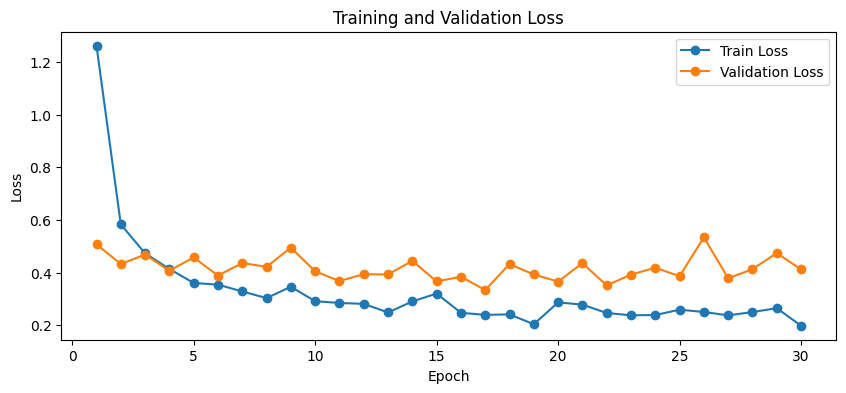

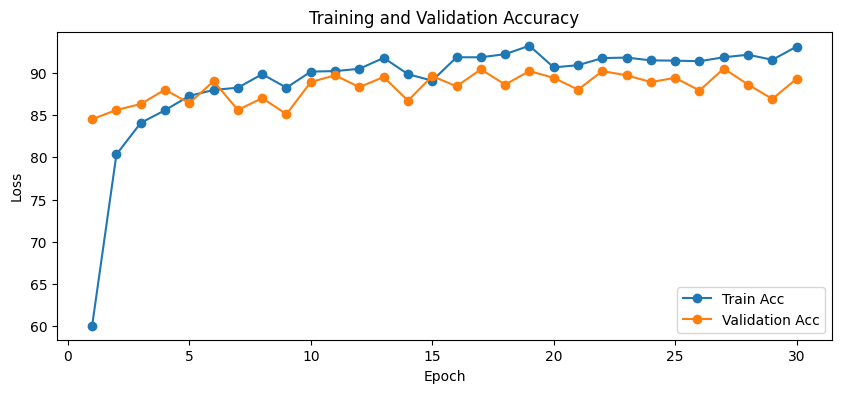

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Acc", marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Acc", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

From the graph, we observe that the both training and validation loss decrease rapidly in the first few epochs, indicating that the model quickly learns from the data. After the initial drop, both losses stabilize.


The model achieves high accuracy (around 90%) on both training and validation, and small gap between training and validation accuracy suggests good generalization. After about epoch 10, both metrics plateau with minor fluctuations.


**Model Evaluation (Test Set)**

In [ ]:
trained_model = ResNet_CNN()
trained_model.load_state_dict(torch.load("/content/best_cnn_model.pth"))
if torch.cuda.is_available():
  trained_model.cuda()

trained_model.eval()
correct, total = 0, 0

with torch.no_grad():
  for imgs, labels in test_loader:
    if torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    outputs = model(imgs)
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 90.20%


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


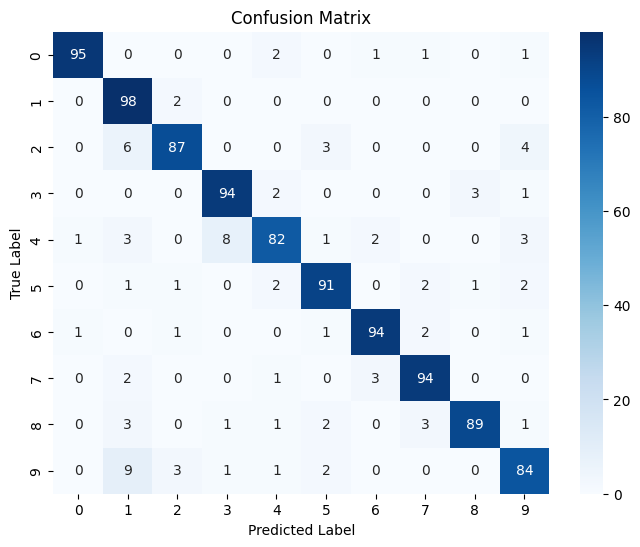

In [ ]:
model = ResNet_CNN(num_classes=10)
model.load_state_dict(torch.load("/content/best_cnn_model.pth", map_location=torch.device('cpu')))
model.to(device)
model.eval()

# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Result Presentation

| Model | Test Accuracy | Training Epoch | Time Cost |
|---|---|---|---|
| Fine-tuned ResNet18 | 90.38% | 20 | approx 30 mins |
| Transfer Learning + CNN | 90.20% | 30 | approx 8 mins |

*Method 1: Fine-tune*

The model trained on the balanced dataset demonstrates strong overall performance, achieving a test accuracy of 90.38%. As seen in the confusion matrix in the Method 1 section, the predictions are well-distributed across all 10 classes, with fewer misclassifications, especially in classes that were previously underrepresented. The training and validation accuracy consistently improved over epochs, and the validation loss decreased steadily, indicating effective learning and good generalization without overfitting.

In comparison, the model (shown in Appendix A) trained on the dataset with two imbalanced classes, recycle and non-recycle styrofoams, achieved a slightly lower test accuracy of 89.20%. The confusion matrix for this model shows that the model struggled more with the underrepresented classes, leading to higher misclassification rates. For instance, class 6 experienced greater confusion with other classes compared to the balanced setup. This imbalance likely caused the model to be biased towards the majority classes, resulting in poor representation of minority class features during training.

The performance gain after balancing the dataset—particularly in per-class accuracy and reduced confusion—highlights the importance of addressing class imbalance. The balanced model achieved not only higher overall accuracy but also improved fairness and robustness across all classes. This suggests that even modest data augmentation and sampling strategies can significantly enhance model reliability, especially in multi-class classification tasks.









*Method 2: Transfer-learning*

The results indicate that the transfer learning approach performed well, achieving a test accuracy of 90.2%. This demonstrates the effectiveness of leveraging a pretrained ResNet18 backbone for feature extraction, even on a relatively small dataset. The training and validation accuracy curves show that the model was able to generalize successfully, with a balanced fit between underfitting and overfitting.

Compared to the baseline model (Appendix B) described in the appendix, our current approach applies a more refined CNN architecture and a stronger data augmentation strategy. While both models use ResNet18 as a frozen feature extractor, the current model simplifies the classifier head and includes global average pooling, resulting in improved generalization. Additionally, the use of more diverse transformations—such as random rotations, color jittering, and horizontal flips—enhanced the model's robustness to visual variability in the training set.


### Example of Implementation on New Data

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

target_class = ["batteries. Watch out, they are unrecyclable and hazardous!",
          "egg shell. It's the best buddy with organic waste!",
          "food waste. It's the superstar of organic waste. Send it to the green bin where it belongs!",
          "glass. This transparent hero is 100% recyclable!",
          "plastic bottle. This recyclable champion is ready for a second life after finished!",
          "plastic straws. These cute-looking guys are made of plastic, but non-recyclable!",
          "styrofoam container. Let me see. Hmm... This kind of styrofoam container is non-recyclable!",
          "styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!",
          "styrofoam cups. It is recyclable after use. Don't forget, that means blue bin!",
          "tea bag. It belongs to organic waste. Green tea, green bin. Easy task!"]


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchvision import models
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
_ = !unzip "/content/test_img.zip" -d "/content/test_img"

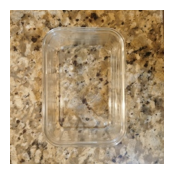

This is an image of glass. This transparent hero is 100% recyclable!


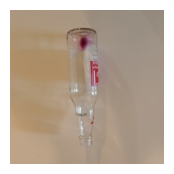

This is an image of glass. This transparent hero is 100% recyclable!


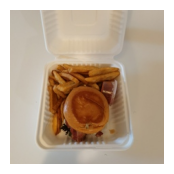

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is non-recyclable!


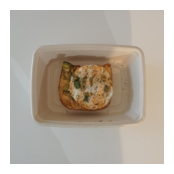

This is an image of tea bag. It belongs to organic waste. Green tea, green bin. Easy task!


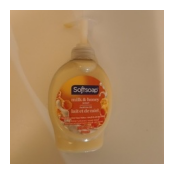

This is an image of glass. This transparent hero is 100% recyclable!


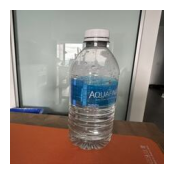

This is an image of plastic bottle. This recyclable champion is ready for a second life after finished!


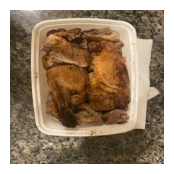

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is non-recyclable!


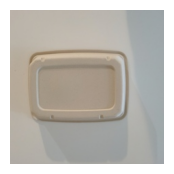

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


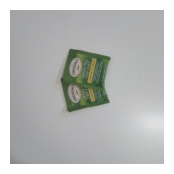

This is an image of tea bag. It belongs to organic waste. Green tea, green bin. Easy task!


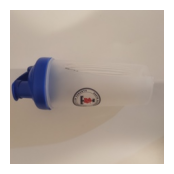

This is an image of plastic bottle. This recyclable champion is ready for a second life after finished!


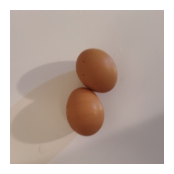

This is an image of egg shell. It's the best buddy with organic waste!


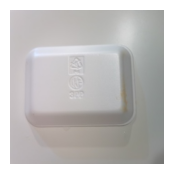

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


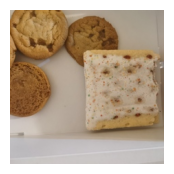

This is an image of egg shell. It's the best buddy with organic waste!


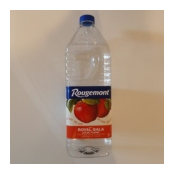

This is an image of plastic bottle. This recyclable champion is ready for a second life after finished!


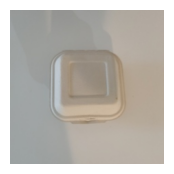

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


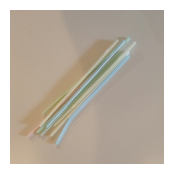

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


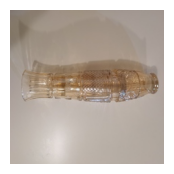

This is an image of glass. This transparent hero is 100% recyclable!


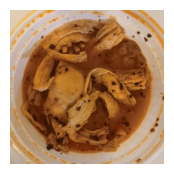

This is an image of food waste. It's the superstar of organic waste. Send it to the green bin where it belongs!


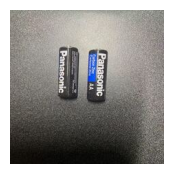

This is an image of batteries. Watch out, they are unrecyclable and hazardous!


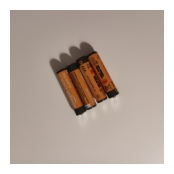

This is an image of batteries. Watch out, they are unrecyclable and hazardous!


In [ ]:
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.load_state_dict(torch.load('fine_tuned_resnet18_after.pth', map_location=torch.device('cpu')))
model.eval()

folder = '/content/test_img'
for filename in os.listdir(folder):
  image_path = os.path.join(folder, filename)
  if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
    continue

  image = Image.open(image_path).convert('RGB')
  input_tensor = transform(image)
  input_batch = input_tensor.unsqueeze(0)
  with torch.no_grad():
    output = model(input_batch)
  probabilities = F.softmax(output, dim=1)
  _, predicted_class = torch.max(output, 1)

  plt.figure(figsize=(2, 2))
  plt.imshow(image)
  plt.axis('off')
  plt.show()
  print(f'This is an image of', target_class[predicted_class.item()])

We photoed 20 new images from life in total, covering 9 of the 10 classes. Our best fine-tuned model reached an accuracy of 80% on this new test set. Successful distinguishments between food waste and styrofoam container with food, and styrofoam containers of separate status deserve to be highlighted, which is a proof of the model robustness. Misclassifications mainly lie on plastic and glass, straw, and tea bag, which correspond to the model performance shown from the covariance matrix.

### Discussion

**Fine-tune Method**

The model trained on the balanced dataset performed well across most classes. One of the most notable successes was its ability to accurately differentiate between recyclable and non-recyclable Styrofoam containers. Although these items often share similar shapes, the model was able to leverage subtle differences in color, texture, and visual patterns to distinguish between them. This demonstrates the model’s ability to learn fine-grained features when provided with a sufficient and balanced number of training examples. The improved confusion matrix further confirms that the model generalized better across all classes when class imbalance was addressed through augmentation and data expansion.

However, certain limitations still persisted. One of the major challenges was differentiating between glass and plastic bottles. These materials are often similar in both shape and transparency, which makes it difficult for the model to learn distinct, class-specific visual features. This overlap in appearance likely leads to increased misclassification between the two categories, as observed in the confusion matrices. Additionally, tea bags presented another difficulty due to their high intra-class variability. Tea bags can differ greatly in shape, color, and packaging style, introducing noise into the training data. This inconsistency makes it challenging for the model to extract and generalize meaningful features.

To address the challenges of distinguishing between glass and plastic bottles, as well as handling the variability in tea bag appearances, future work could leverage advanced architectures such as the Swin Transformer. This model excels at capturing fine-grained, hierarchical visual details through its shifted window mechanism, which can help differentiate subtle textural and shape cues between similar materials. For the tea bag class, collecting a more diverse and balanced dataset—with consistent lighting, angles, and packaging types—can help reduce intra-class variability. Augmenting the dataset with targeted transformations may also enhance model generalization, improving robustness and classification accuracy across all object categories.

**Transfer Learning Method**

Transfer learning is effective for achieving fast and accurate predictions on small datasets with limited labelled samples. However, this approach shows limitations when dealing with more complex inputs — for example, images with multiple plastic straws overlapping or placed on cluttered backgrounds, the ability to generalize in such cases is reduced.

Moreover, since the ResNet backbone remained frozen during training to prevent overfitting and accelerate convergence, the model’s ability to adapt its features to our dataset’s unique characteristics (Tea bag and plastic straw) was constrained. This trade-off indicates the importance of a balanced approach to transfer learning: although it speeds up training and boosts performance with limited data, it can also hinder the model’s capacity to handle substantial intra-class variation or intricate spatial configurations.

While the model achieved strong performance, further improvements could involve fine-tuning selected ResNet layers rather than freezing the entire backbone. This could allow the network to better adapt to domain-specific patterns, particularly in more complex or noisy input scenarios. Additionally, incorporating regularization techniques such as dropout or batch normalization could help reduce minor fluctuations in validation loss and enhance robustness.

### Related Works

Several developers and researchers have explored the use of ResNet architectures for automated waste classification. In “Using Res-Net for Trash Classification” (Pragyan R., 2025), [1] the author fine-tuned a pre-trained ResNet-50 model to classify waste into multiple categories. The article offers a comprehensive overview of dataset preparation, model architecture adjustments, and training strategies. The author emphasized the benefits of transfer learning in reducing training time while achieving high accuracy, especially when using well-structured image datasets. Notably, the model was able to accurately differentiate between visually similar waste items, showcasing the strength of ResNet’s feature extraction capabilities.

In another study, “Garbage Classification” by Dany Stefan (2022),[2] the performance of the ResNet model was directly compared to the Xception architecture. The author found that ResNet consistently outperformed Xception in classification accuracy, particularly for materials with subtle visual differences such as plastic and glass. This result underscores ResNet’s ability to capture and generalize complex visual patterns across waste types.

These works demonstrate the practical effectiveness of ResNet-based models for garbage classification tasks and serve as useful references for our own approach, where we also fine-tune a ResNet18 model to distinguish between recyclable, non-recyclable, and organic waste.


**References:**

1. https://pragyanr.medium.com/using-res-net-for-trash-classification-9d25a41d3129
2. https://medium.com/%40d4388707373/garbage-classification-f133c0d2181d

# Appendix

#### Appendix A Method 1: Fine-tune ResNet18 Without Data Augementation (Initial Dataset)

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load all images from a single folder
dataset_path = "/content/drive/MyDrive/Meng/Winter/1517_Project/img"
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into train (65%), val (15%), test (20%)
train_idx, temp_idx = train_test_split(range(len(full_dataset)), test_size=0.35, stratify=full_dataset.targets, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.57, stratify=[full_dataset.targets[i] for i in temp_idx], random_state=42)

# Create Subset Datasets
train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)
test_dataset = Subset(full_dataset, test_idx)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Print dataset split sizes
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Training samples: 2923
Validation samples: 677
Test samples: 898


In [ ]:
model = models.resnet18(pretrained=True)

# Modify the fully connected layer first
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

# Freeze all layers except the final FC layer
for param in model.parameters():
    param.requires_grad = False

# Train only the final fully connected layer
for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 219MB/s]


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)


Trainable Parameters:
fc.weight
fc.bias


In [ ]:
train_losses, train_accuracies, val_losses, val_accuracies = train_and_validate(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=20
)

torch.save(model.state_dict(), "fine_tuned_resnet18.pth")
print("Model saved successfully!")



Epoch [1/20], Train Loss: 2.2068, Train Acc: 20.36%, Val Loss: 1.9441, Val Acc: 41.06%
Epoch [2/20], Train Loss: 1.7639, Train Acc: 52.17%, Val Loss: 1.5627, Val Acc: 65.88%
Epoch [3/20], Train Loss: 1.4405, Train Acc: 68.22%, Val Loss: 1.3002, Val Acc: 74.15%
Epoch [4/20], Train Loss: 1.2147, Train Acc: 75.40%, Val Loss: 1.1141, Val Acc: 79.32%
Epoch [5/20], Train Loss: 1.0555, Train Acc: 79.13%, Val Loss: 0.9787, Val Acc: 81.98%
Epoch [6/20], Train Loss: 0.9299, Train Acc: 81.32%, Val Loss: 0.8777, Val Acc: 83.46%
Epoch [7/20], Train Loss: 0.8482, Train Acc: 82.89%, Val Loss: 0.7993, Val Acc: 83.75%
Epoch [8/20], Train Loss: 0.7754, Train Acc: 83.65%, Val Loss: 0.7421, Val Acc: 84.93%
Epoch [9/20], Train Loss: 0.7257, Train Acc: 84.09%, Val Loss: 0.6957, Val Acc: 84.49%
Epoch [10/20], Train Loss: 0.6668, Train Acc: 85.70%, Val Loss: 0.6473, Val Acc: 85.82%
Epoch [11/20], Train Loss: 0.6274, Train Acc: 86.79%, Val Loss: 0.6184, Val Acc: 86.71%
Epoch [12/20], Train Loss: 0.5981, Train 

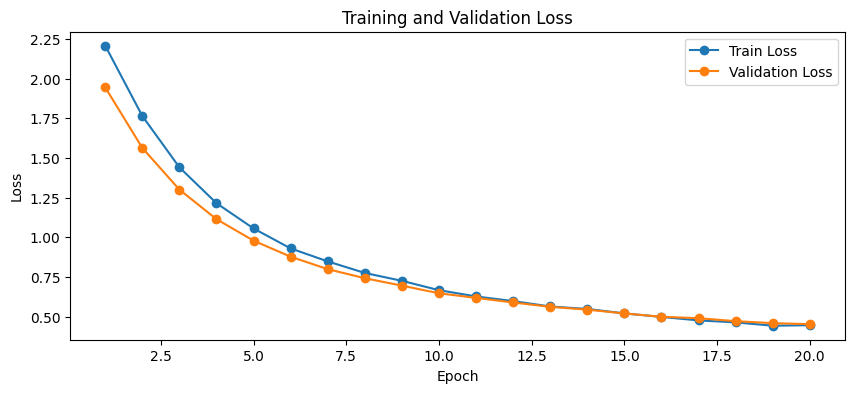

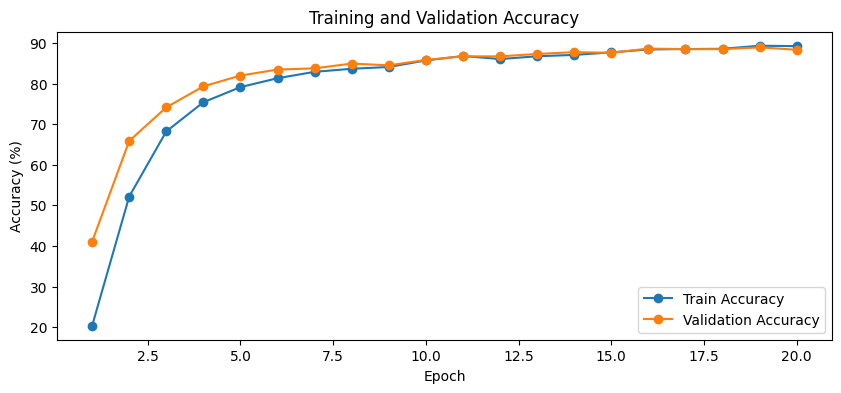

In [ ]:
# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
# Evaluate on Test Set
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.2f}%")


Test Accuracy: 89.20%


In [ ]:
# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

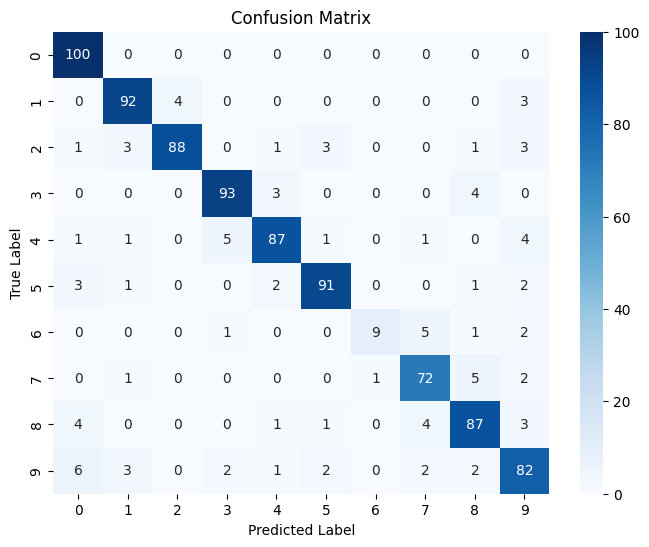

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Appendix B Method 2: Transferlearning ResNet18 Without Data Augementation

In [ ]:
dataset = '/content/img'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.ImageFolder(dataset, transform=transform)
classes = dataset.classes

indices = list(range(len(dataset)))
targets = np.array(dataset.targets)


test_split = 0.2

train_val_indices, test_indices = train_test_split(
    indices, test_size=test_split, random_state=42, stratify=targets
)


valid_split = 0.25


train_val_targets = targets[train_val_indices]
train_indices, val_indices = train_test_split(
    train_val_indices, test_size=valid_split, random_state=42, stratify=train_val_targets
)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [ ]:
class ResNet_CNN(nn.Module):
  def __init__(self, num_classes=10):
    super(ResNet_CNN, self).__init__()

    self.resnet = torchvision.models.resnet18(pretrained=True)
    self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])  # Remove last FC layer

    self.conv1 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    #self.pool1 = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    #self.pool2 = nn.MaxPool2d(2, 2)

    self.fc = nn.Linear(128, num_classes)

  def forward(self, x):
    x = self.resnet(x)

    x = F.relu(self.conv1(x))
    #x = self.pool1(x)
    x = F.relu(self.conv2(x))
    #x = self.pool2(x)

    x = x.view(x.size(0), -1)
    x = self.fc(x)

    return x

In [ ]:
model = ResNet_CNN()
if torch.cuda.is_available():
  model.cuda()

model, train_losses, val_loss, best_loss = train(model, train_loader, val_loader, learning_rate=0.01, epochs=30)


Best model saved at epoch 1 with validation loss: 2.5061
Epoch 1/30, Train Loss: 2.2406, Val Loss: 2.5061
Best model saved at epoch 2 with validation loss: 2.0854
Epoch 2/30, Train Loss: 1.9730, Val Loss: 2.0854
Epoch 3/30, Train Loss: 1.9913, Val Loss: 2.1199
Epoch 4/30, Train Loss: 1.8605, Val Loss: 2.2456
Best model saved at epoch 5 with validation loss: 2.0513
Epoch 5/30, Train Loss: 1.9212, Val Loss: 2.0513
Best model saved at epoch 6 with validation loss: 1.9147
Epoch 6/30, Train Loss: 1.8001, Val Loss: 1.9147
Epoch 7/30, Train Loss: 1.7680, Val Loss: 2.1574
Epoch 8/30, Train Loss: 1.6520, Val Loss: 2.2103
Best model saved at epoch 9 with validation loss: 1.7229
Epoch 9/30, Train Loss: 1.7194, Val Loss: 1.7229
Epoch 10/30, Train Loss: 1.6284, Val Loss: 3.0816
Best model saved at epoch 11 with validation loss: 1.6706
Epoch 11/30, Train Loss: 1.6513, Val Loss: 1.6706
Epoch 12/30, Train Loss: 1.5894, Val Loss: 1.7793
Epoch 13/30, Train Loss: 1.5326, Val Loss: 1.7998
Epoch 14/30, Tra

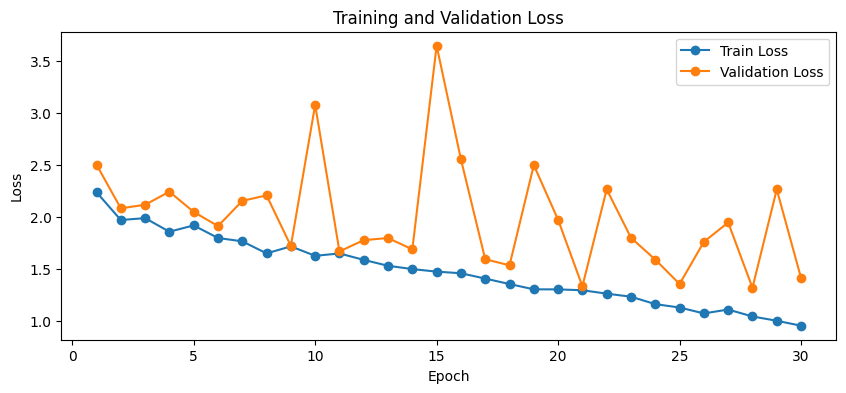

In [ ]:
# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [ ]:
trained_model = ResNet_CNN()
trained_model.load_state_dict(torch.load("/content/best_cnn_model.pth"))
if torch.cuda.is_available():
  trained_model.cuda()

trained_model.eval()
correct, total = 0, 0

with torch.no_grad():
  for imgs, labels in test_loader:
    if torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    outputs = model(imgs)
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.2f}%")

<ipython-input-8-e9478f36932f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load("/content/best_cnn_model.pth"))


Test Accuracy: 56.00%


Test on another trained model

In [ ]:
trained_model = ResNet_CNN()
trained_model.load_state_dict(torch.load("/content/best_cnn_model.pth"))
if torch.cuda.is_available():
  trained_model.cuda()

trained_model.eval()
correct, total = 0, 0

with torch.no_grad():
  for imgs, labels in test_loader:
    if torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    outputs = model(imgs)
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 91.00%


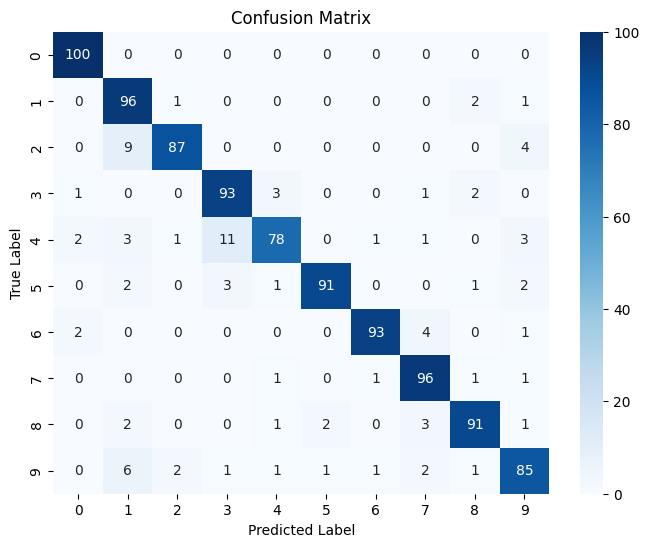

In [ ]:
# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
  for images, labels in test_loader:
    if torch.cuda.is_available():
      images, labels = images.cuda(), labels.cuda()
    outputs = model(images)
    _, predicted = outputs.max(1)

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()